<a href="https://colab.research.google.com/github/dhivyasreedhar/Music-Instrument-Recognition/blob/main/spec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
classes=['cello','flute','oboe','sax','trumpet','viola']

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt 
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd # needed to preview audio file
import os

In [4]:
# Mel Spectrogram (less white around)

def mel_spectrogram(audio_files):

    image_path = fullPath + 'spectrograms/'
    try:
        os.makedirs(image_path)
    except FileExistsError as exception:
        print('')

    for audio in audio_files:
        y = audio[0]
        sr = audio[1]
        file = audio[2]

        S = librosa.feature.melspectrogram(y=y, sr=sr)
        fig, ax = plt.subplots(figsize=(15,7.5))
        S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, sr=sr)

        fig.savefig(image_path + file[:-4] + '.png', transparent=True)
        plt.close(fig)

In [5]:
# load audio
pathAudio = "/content/drive/MyDrive/london_phill_dataset_multi"
folders = os.listdir(pathAudio)
fullPath = pathAudio +  '/'
files = os.listdir(fullPath)
audio_files = []

for file in files:
        if '.mp3' in file:
            temp = librosa.load(fullPath + file)
            temp = list(temp)
            temp.append(file)
            temp = tuple(temp)
            audio_files.append(temp)
    
print('Loaded files from \'' + fullPath + '\'')
mel_spectrogram(audio_files)

print('Saved spectrograms.')

Loaded files from '/content/drive/MyDrive/london_phill_dataset_multi/'

Saved spectrograms.


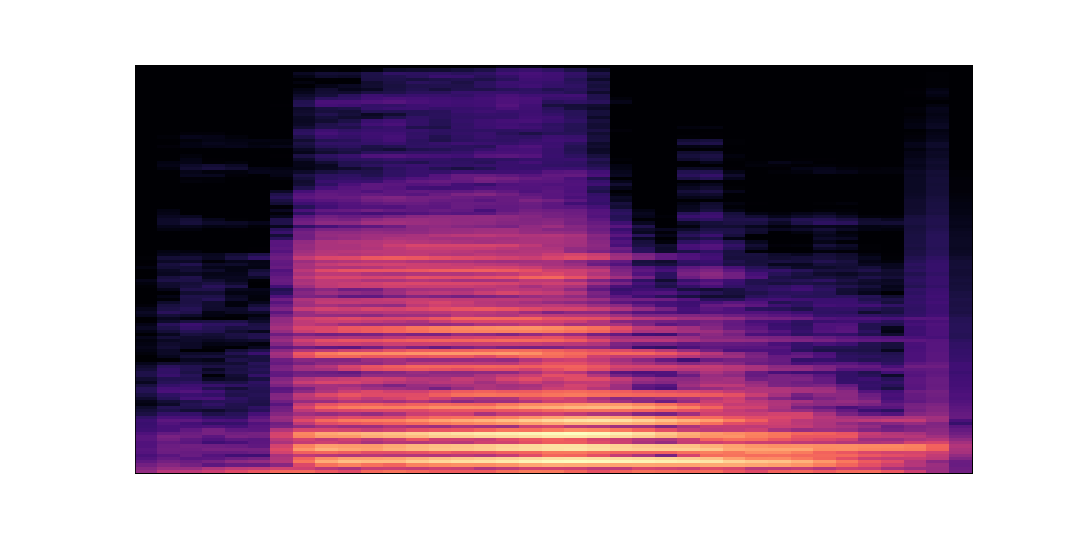

In [7]:
img=image.load_img("/content/drive/MyDrive/london_phill_dataset_multi/spectrograms/cello_A2_025_forte_arco-normal.png")
img

In [8]:
img_arr=image.img_to_array(img)
print(img_arr.shape)

(540, 1080, 3)


In [9]:
img_arr=np.expand_dims(img_arr,axis=0)
print(img_arr.shape)

(1, 540, 1080, 3)
